## Import important libraries 

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , train_test_split 

In [13]:
pwd

'/Users/makhtar/Documents/learnpython/project_1_datacleaning_&_EDA_resources'

### Download Excel file

In [143]:
df = pd.read_excel('data/premiums_young_with_gr.xlsx')

In [15]:
df.shape

(20096, 14)

In [16]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [17]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [18]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [19]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [20]:
df.head(4)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2


### Handle Null Values 

In [21]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [22]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle Duplicated Value

In [23]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Explorartory Data Analysis - EDA

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.



In [24]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [25]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [26]:
df.select_dtypes(['int64']).head(2)

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
0,18,0,99,13365,4
1,22,0,3,11050,3


#### Visualize the outliers using box-plot in above EDA

In [27]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

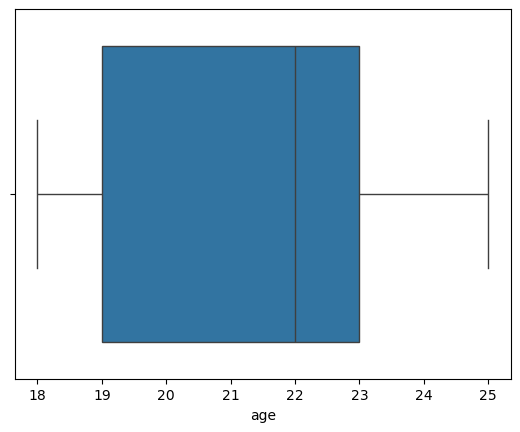

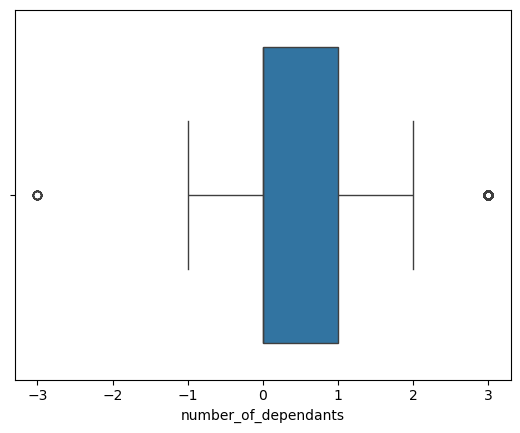

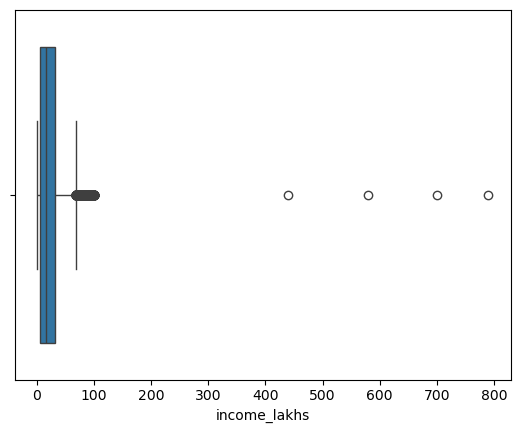

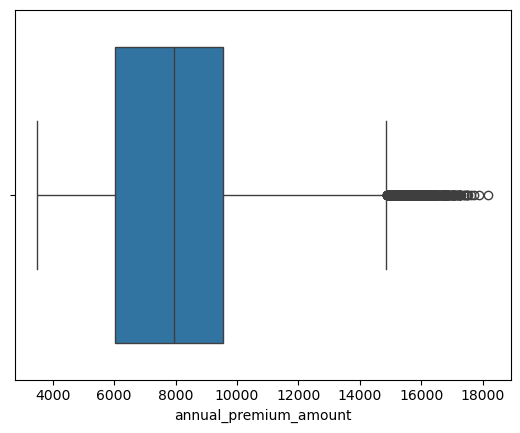

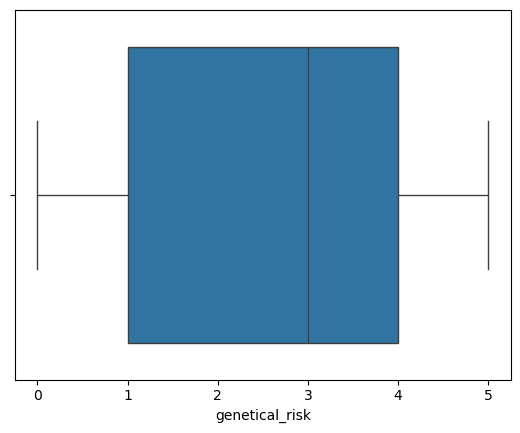

In [28]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

### Treating outlier in Age 

In [29]:
df[df.age > 100].shape

(0, 14)

In [30]:
df[df.age > 100]['age'].unique()

array([], dtype=int64)

In [31]:
df1 = df[df.age < 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### Treatment of outliers in number_of_dependants Variable

In [32]:
df1[df1.number_of_dependants < 0 ].shape

(22, 14)

In [33]:
df1[df1.number_of_dependants < 0 ]['number_of_dependants'].unique()

array([-3, -1])

In [34]:
df1.number_of_dependants = abs(df1['number_of_dependants'])
df1.number_of_dependants.describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [35]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### Outlier treament in Income_lakhs

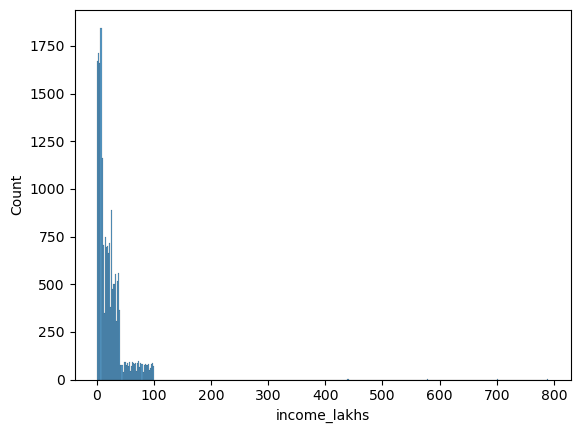

In [36]:
sns.histplot(df1['income_lakhs'])
plt.show()

In [37]:
df1['income_lakhs'].describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95 , 0.99, 0.999])

count    20090.000000
mean        22.510851
std         23.420493
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
90%         51.000000
95%         75.000000
99%         95.000000
99.9%      100.000000
max        790.000000
Name: income_lakhs, dtype: float64

In [38]:
df1[df1['income_lakhs'] > 100.000000].shape 

(4, 14)

In [39]:
df1['income_lakhs'].quantile([0.25, 0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [40]:
def get_iqr_bound(col):
    Q1 , Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound , upper_bound

In [41]:
get_iqr_bound(df1['income_lakhs'])

(-31.5, 68.5)

In [42]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

100.0

In [43]:
df1[df1.income_lakhs > quantile_threshold].shape

(4, 14)

In [44]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


In [45]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


### Examine the Distribution of the Target Column

The target is what we are asked to predict 

In [46]:
df2['annual_premium_amount'].value_counts()

annual_premium_amount
8351     11
7603      9
7845      9
8140      9
7723      9
         ..
12136     1
7861      1
3725      1
13894     1
14498     1
Name: count, Length: 8711, dtype: int64

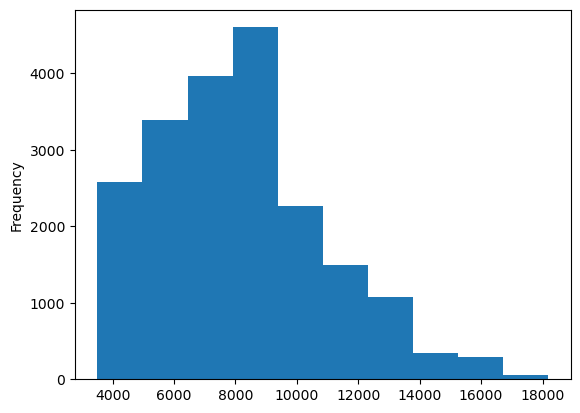

In [47]:
df2['annual_premium_amount'].plot.hist();

#### Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs,annual_premium_amount.

In [48]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

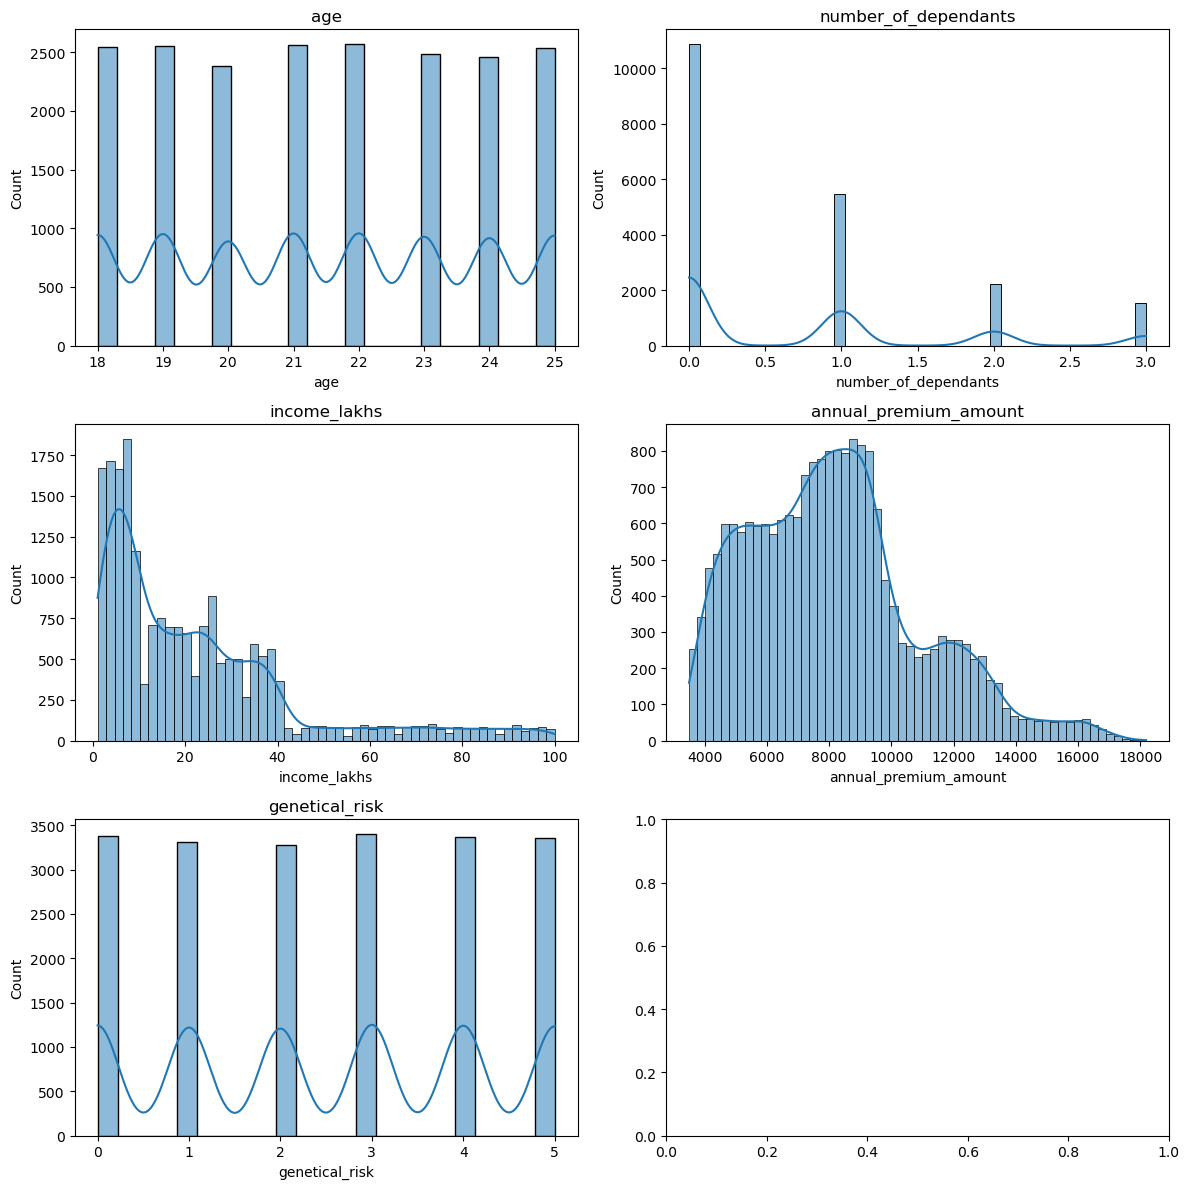

In [49]:
num_rows = 3
# create subplot 
fig, axes = plt.subplots(num_rows , ncols = 2 , figsize = (12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(numeric_columns):
    sns.histplot(x = df2[col],ax = axes[i], kde = True)
    axes[i].set_title(col)
    # Rotate x_axis label for better readibility
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)
# hide any unused subplots
#for i in range(len(col), len(axes)):
    #fig.delaxes(axes[i])
plt.tight_layout()   
plt.show()    

<Axes: xlabel='age', ylabel='annual_premium_amount'>

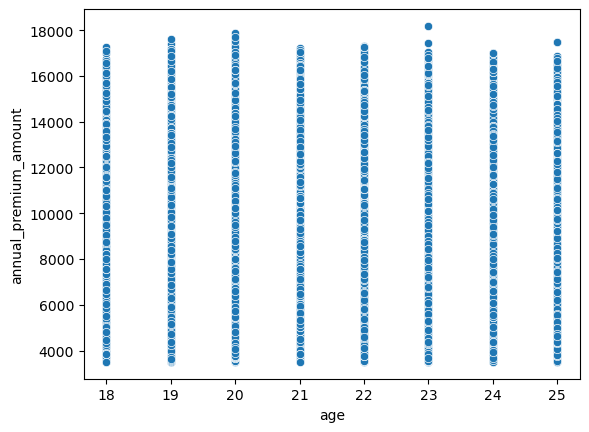

In [50]:
sns.scatterplot(df2 , x = 'age' , y='annual_premium_amount')

Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs v/s annual_premium_amount.

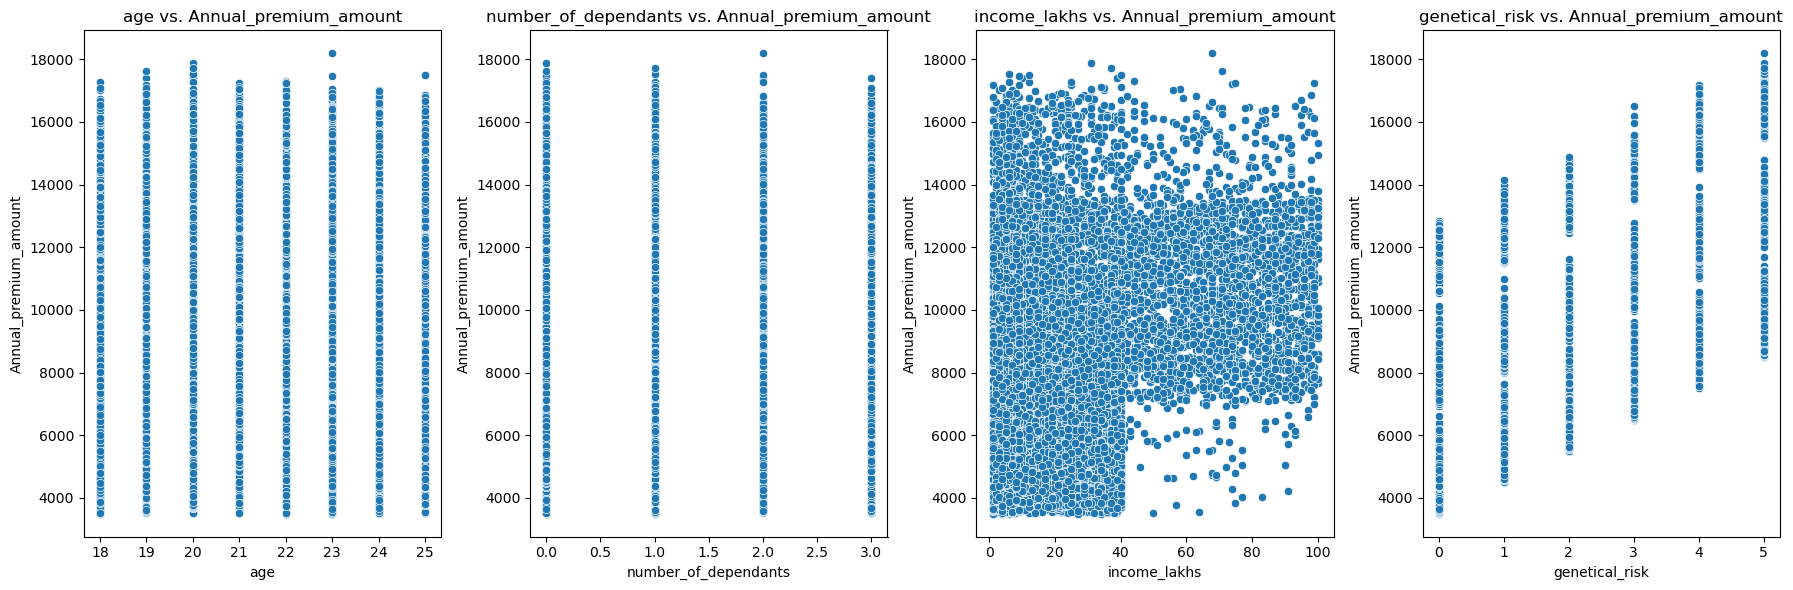

In [51]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs','genetical_risk']
# create subplot 
fig, axes = plt.subplots(1 , len(columns_feature), figsize = (18,6))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(columns_feature):
    sns.scatterplot(x = df2[col],y = df2['annual_premium_amount'],ax = axes[i])
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')
    
#Adjust the layout
plt.tight_layout()   
plt.show()    

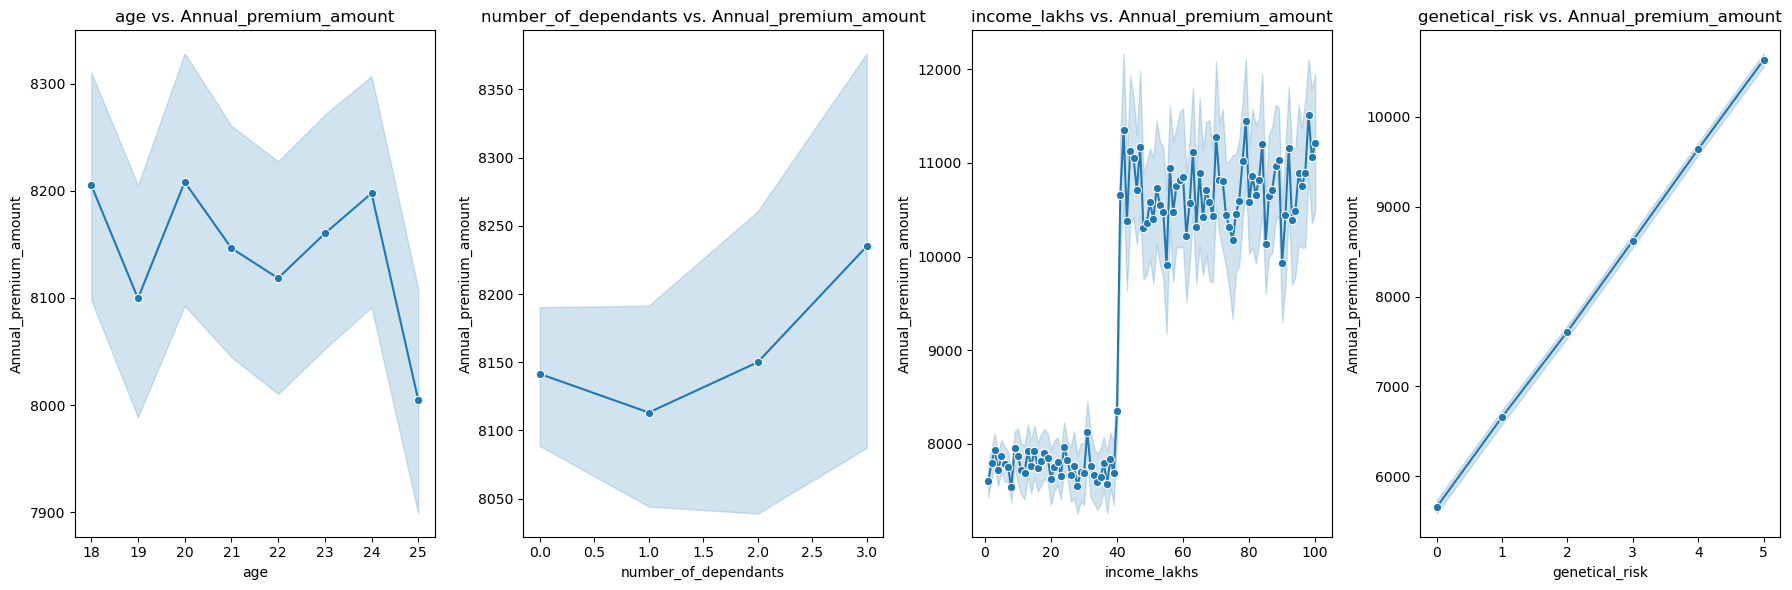

In [52]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs','genetical_risk']
# Create subplots
fig, axes = plt.subplots(1, len(columns_feature), figsize=(18, 6))

# Flatten the axes array
axes = axes.flatten()

# Create line plots for each feature
for i, col in enumerate(columns_feature):
    # Sort the DataFrame by the feature column for proper line plotting
    df2_sorted = df2.sort_values(by=col)  # Sort by the current column

    sns.lineplot(x=df2_sorted[col], y=df2_sorted['annual_premium_amount'], ax=axes[i], marker='o') # Add marker for visibility
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')

# Adjust the layout
plt.tight_layout()
plt.show()


#### Categorical columns - Check Unique Value in each Columns

In [53]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [54]:
df2['smoking_status'].replace(
    {
     'Smoking=0' :'No Smoking',
     'Does Not Smoke' : 'No Smoking',
     'Not Smoking':'No Smoking'
    },
inplace = True)
df2.smoking_status.unique()

/var/folders/3l/rgvdw04906v_cqrsrld879880000gn/T/ipykernel_3136/3120975542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [55]:
# Check treatment in smoking_status
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [56]:
pct_count = df2.gender.value_counts(normalize = True)
pct_count 

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

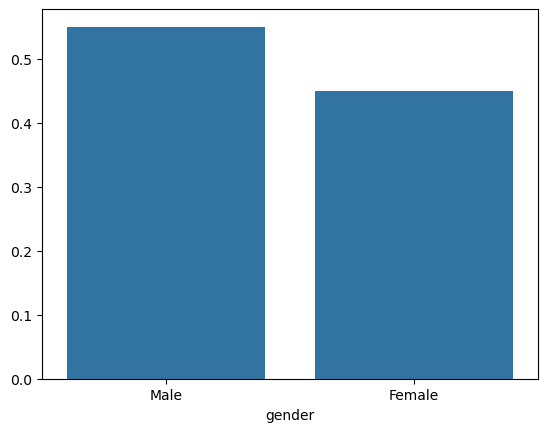

In [57]:
sns.barplot(x = pct_count.index , y = pct_count.values)

#### Plot a graphs to visualize the percentage distribution Categorical Columns 

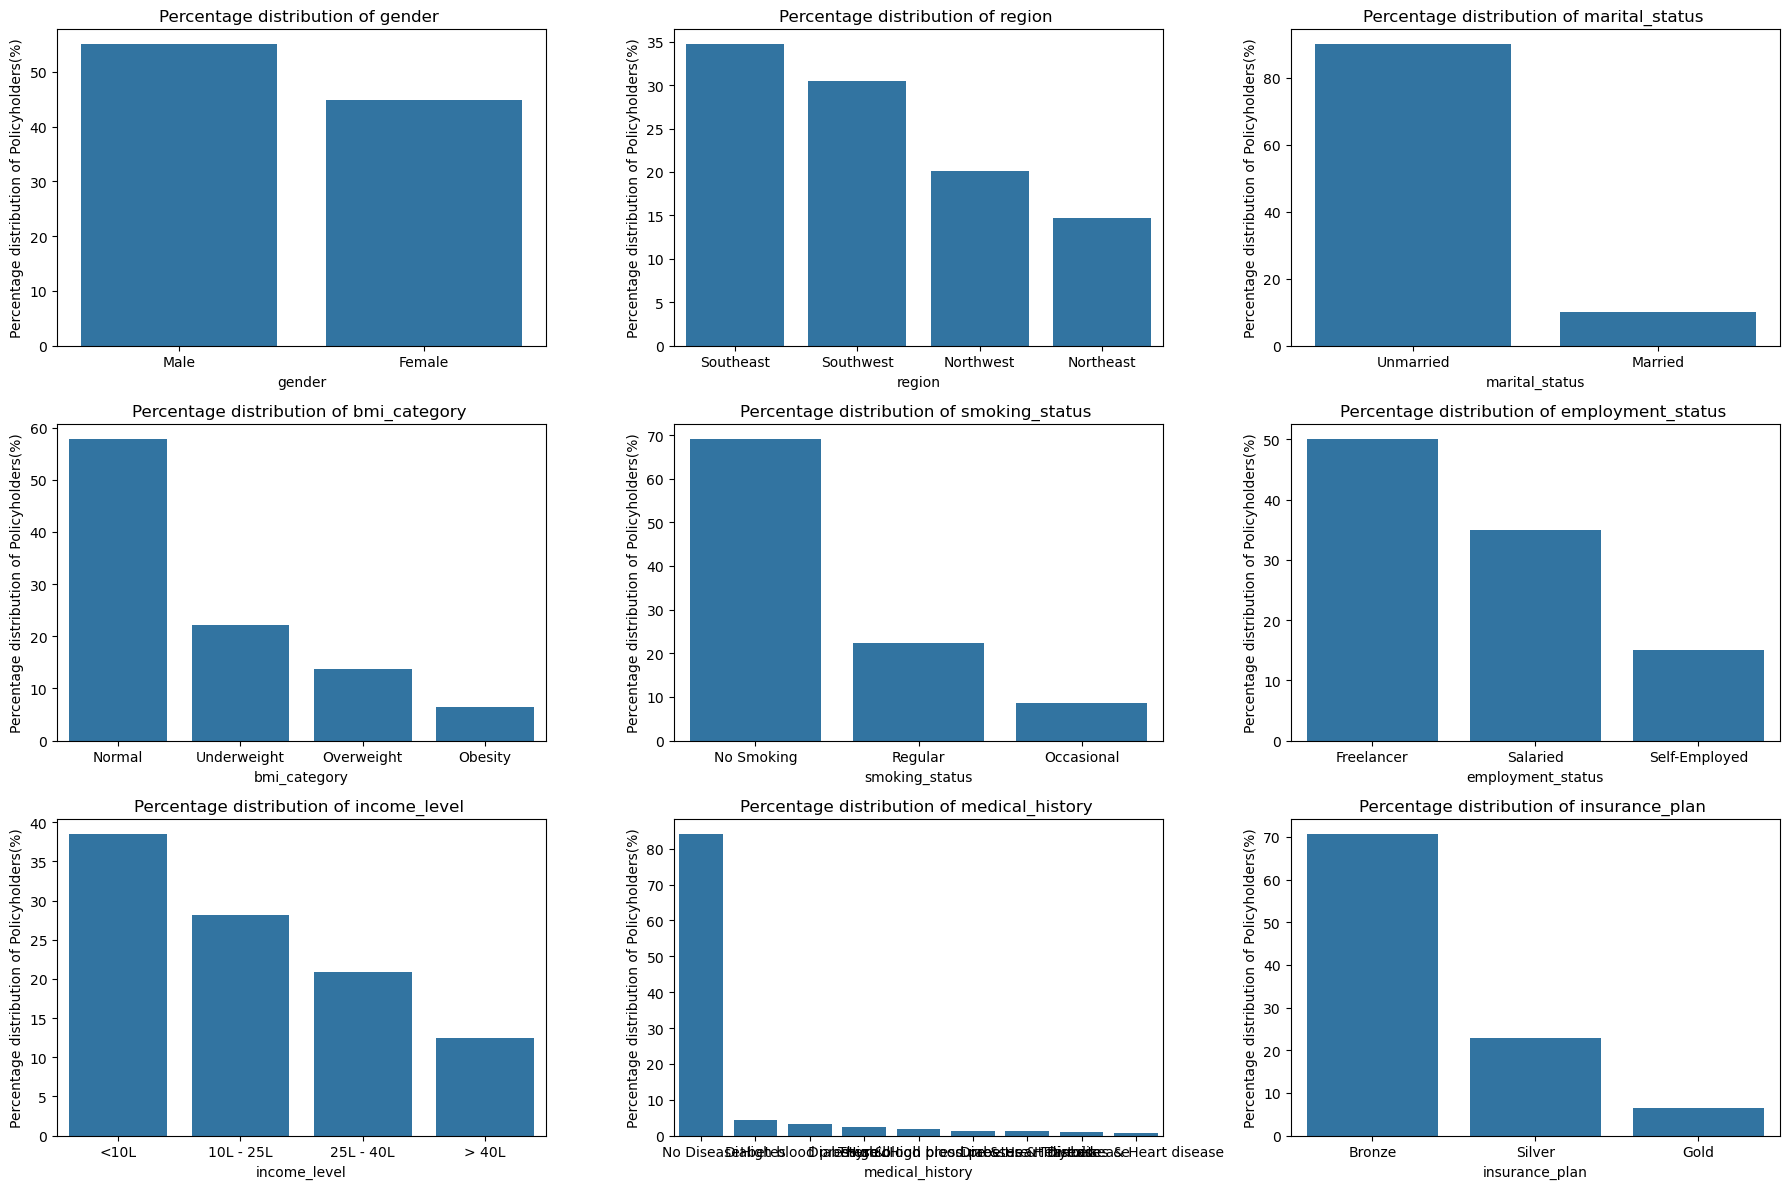

In [58]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']
# create subplot 
fig, axes = plt.subplots(3,3, figsize = (18,12))  # Adjust figsize as necessory

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(categorical_cols):
    # calculate the percentage distribution of each category 
    category_count = df2[col].value_counts(normalize = True) * 100

    # Plotting the distribution using barplot 
    sns.barplot(x = category_count.index,y = category_count.values ,ax = axes[i])
    axes[i].set_title(f'Percentage distribution of {col} ')
    axes[i].set_xlabel(col)  # set xlabel for columns name for better clarity
    axes[i].set_ylabel('Percentage distribution of Policyholders(%)')
    
#Adjust plot parameters for better fit in figure window
plt.tight_layout()   
plt.show()    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


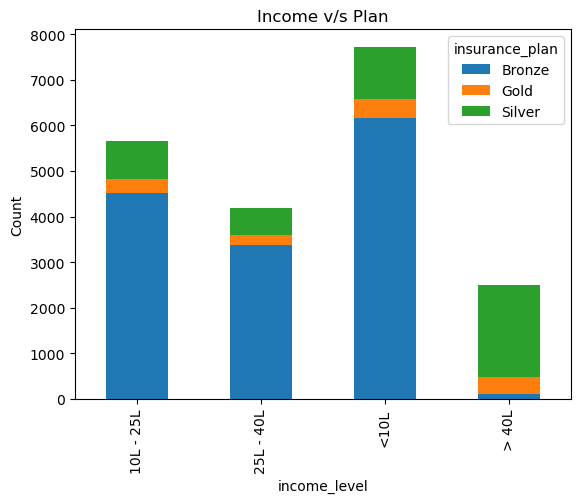

In [59]:
cross_tab = pd.crosstab(df2['income_level'] , df2['insurance_plan'])
print(cross_tab)

cross_tab.plot(kind = "bar", stacked = True)
plt.title('Income v/s Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

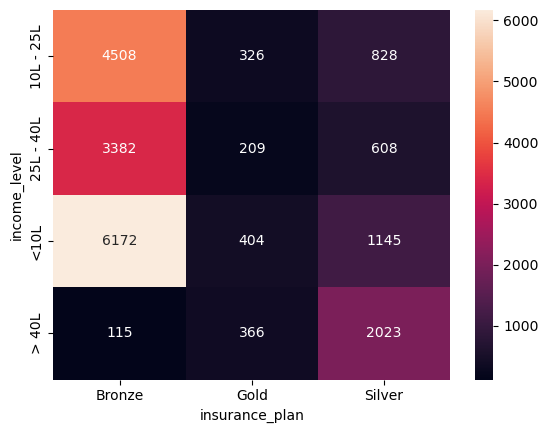

In [60]:
sns.heatmap(cross_tab , annot = True , fmt = 'd')

## Feature Engineering

In [61]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [62]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [63]:
df2.shape

(20086, 14)

### Label encodeing for ordinal data

In [64]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [65]:
risk_scores = ({
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6, 
    'thyroid' : 5 ,
    'no disease': 0,
    'none': 0
})     

In [66]:
df2.medical_history.str.split(" & ", expand = True )

,0,1
0,High blood pressure,None
1,No Disease,None
2,No Disease,None
3,No Disease,None
4,No Disease,None
...,...,...
20091,No Disease,None
20092,Diabetes,None
20093,No Disease,None
20094,No Disease,None


In [67]:
df2[['disease1','disease2']] = df2.medical_history.str.split(" & ", expand = True ).apply(lambda x : x.str.lower())

In [68]:
df2['disease2'].value_counts(dropna = False)

disease2
None                   19082
heart disease            417
high blood pressure      353
thyroid                  234
Name: count, dtype: int64

In [69]:
df2.fillna({'disease1':'none'}, inplace = True)
df2.fillna({'disease2':'none'}, inplace = True)

In [70]:
df2['total_risk_score'] = 0 

for disease in ['disease1','disease2']:
   df2['total_risk_score'] = df2['total_risk_score'] + df2[disease].map(risk_scores)


In [71]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score )/(max_score - min_score)

In [74]:
min_score

0

In [72]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [75]:
df2['normalized_risk_score'].isna().sum()

0

In [76]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [77]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1 ,'Silver': 2,'Gold': 3})

In [78]:
df2.insurance_plan.unique()

array([2, 1, 3])

In [79]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [80]:
df2.income_level = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3,'> 40L':4})

In [81]:
df2.income_level.unique()

array([4, 1, 2, 3])

#### One - hot encoding for Nominal columns

In [83]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'disease1', 'disease2',
       'total_risk_score', 'normalized_risk_score'],
      dtype='object')

In [84]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2 , columns = nominal_cols, drop_first = True, dtype = int)      

In [88]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [89]:
df3['marital_status_Unmarried'].head()

0    1
1    1
2    1
3    1
4    1
Name: marital_status_Unmarried, dtype: int64

In [90]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Correlation 

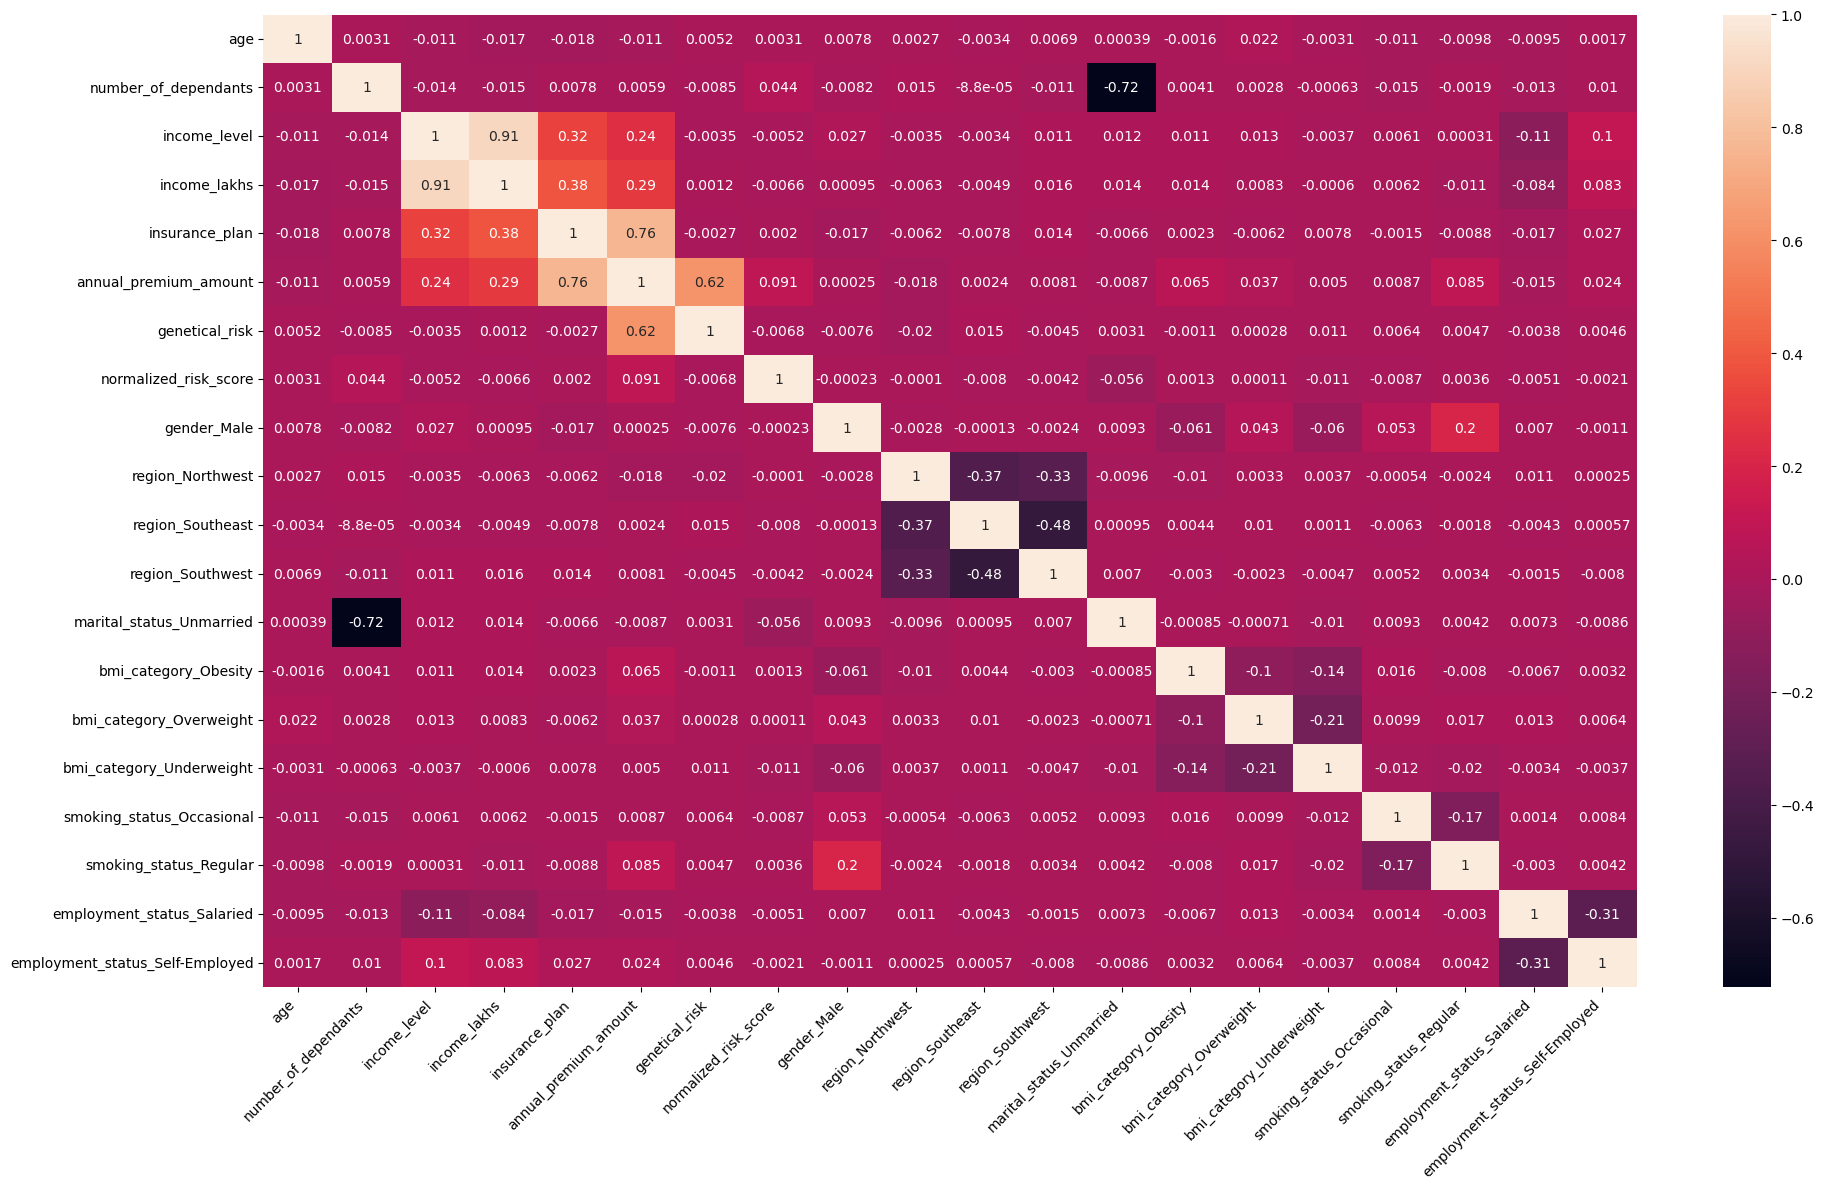

In [91]:
cm = df4.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Scaling the Numeric data 

In [92]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [93]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [94]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


### Variance Inflation factor - to reduce Multicollinarity 

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [97]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [98]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [99]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


# Model Training 

In [131]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [101]:
X_train , X_test , y_train ,y_test = train_test_split(X_reduced , y, test_size = 0.3, random_state = 10)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (14060, 18)
X_test: (6026, 18)
y_train: (14060,)
y_test: (6026,)


### Linear Regression Model and Evaluation Metrics

In [139]:
model_young.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [103]:
# Initialize the LinearRegression
model_lr = LinearRegression()

# Train the model (assuming you have X_train and y_train)

model_lr.fit(X_train , y_train)

# Model coefficient and intercept 
print("Model coefficient is",model_lr.coef_)
print("Model intercept is",model_lr.intercept_)
print()

# Evaluate the model score
train_score= model_lr.score(X_train , y_train)
test_score = model_lr.score(X_test , y_test)
print(f'Model score for train data is {train_score}')
print(f'Model score for test data is {test_score}')
print()

# Make predictions (assuming you have X_test)
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test , y_pred_lr)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model coefficient is [-7.22903185e+00  1.95361819e+01 -1.26452776e+00  7.00112526e+03
  4.99698873e+03  1.10914836e+03  8.17798831e+00  1.67735268e+00
 -3.27532710e+00  6.31709531e+00  1.60689716e+01  8.12844929e+02
  4.00375598e+02  1.07529819e+02  2.05069661e+02  6.10983280e+02
  3.87836470e-02 -5.24201812e+00]
Model intercept is 3978.8235284382445

Model score for train data is 0.988297900194864
Model score for test data is 0.9887263253056615

Mean squared error is 85732.34377930455
R - squared is 0.9887263253056615


In [142]:
y_pred_lr

array([ 6121.456891  ,  9601.79750962,  5611.05649296, ...,
       13508.60367847,  5109.9980527 , 10714.52357833])

In [104]:
feature_importance  = model_lr.coef_
coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients' , ascending = True)

,Coefficients
age,-7.229032
employment_status_Self-Employed,-5.242018
region_Southeast,-3.275327
income_lakhs,-1.264528
employment_status_Salaried,0.038784
region_Northwest,1.677353
region_Southwest,6.317095
gender_Male,8.177988
marital_status_Unmarried,16.068972
number_of_dependants,19.536182


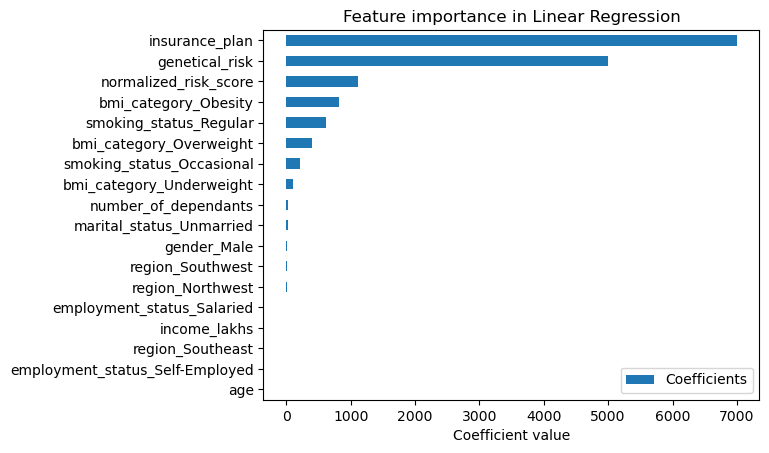

In [105]:
coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
plt.title("Feature importance in Linear Regression")
plt.xlabel("Coefficient value")
plt.show()

### Linear Regression Model- Ridge Regularization and Evaluation Metrics

In [106]:
# Initialize the Ridge
model_rg = Ridge(alpha = 10)

# Train the model (assuming you have X_train and y_train) and calcualte Model score 
model_rg.fit(X_train , y_train)
train_score_rg= model_rg.score(X_train , y_train)
test_score_rg = model_rg.score(X_test , y_test)
print(f'Model score for train data {train_score_rg}')
print(f'Model score for test data {test_score_rg}')

# Make predictions (assuming you have X_test)
y_pred_rg = model_rg.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_rg)
r2 = r2_score(y_test , y_pred_rg)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model score for train data 0.9882386209794508
Model score for test data 0.9886848419551753
Mean squared error is 86047.81011671723
R - squared is 0.9886848419551753


## XGBoost Regressor 

In [107]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
model_xgb = XGBRegressor()  # Or with specific parameters

# Train the model (assuming you have X_train and y_train)
model_xgb.fit(X_train, y_train)
train_score_xgb = model_xgb.score(X_train , y_train) #R^2
test_score_xgb  = model_xgb.score(X_test , y_test) #R^2
print(f'Model score for train data {train_score_xgb}')
print(f'Model score for test data {test_score_xgb}')

# Make predictions (assuming you have X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred_xgb)
print(f"Mean squared error is {mse}")
print(f"Root Mean squared error is {rmse}")
print(f"R - squared is {r2}")

Model score for train data 0.9925054809841402
Model score for test data 0.987729520869432
Mean squared error is 93312.69206188193
Root Mean squared error is 305.4712622520847
R - squared is 0.987729520869432


In [ ]:
# You donot need RandomizedSearchCv as you already got 98% accuracy through linear Regression

## Randomized SearchCV 

In [93]:
#model_xgb = XGBRegressor()
#param_grid = {
#    'n_estimators': [20, 40, 50],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#   }
#random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state = 42, n_jobs=-1)
#random_search.fit(X_train, y_train)
#random_search.best_score_

0.5997089124277125

In [532]:
#df_result_cv = pd.DataFrame(random_search.cv_results_)
#df_result_cv[[ 'param_n_estimators','param_max_depth','params','mean_test_score']]

In [94]:
#random_search.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [96]:
#best_model = random_search.best_estimator_
#best_model

In [100]:
#feature_importance  = best_model.feature_importance_

#coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
#coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
#plt.title("Feature importance in XGBoost")
#plt.xlabel("Coefficient value")
#plt.show()

# Error Analysis

### As linear regression model has highest accuracy , you can consider it as best model among all above 

In [108]:
best_model = model_lr

In [109]:
y_pred = best_model.predict(X_test)

In [110]:
y_pred

array([ 6121.456891  ,  9601.79750962,  5611.05649296, ...,
       13508.60367847,  5109.9980527 , 10714.52357833])

In [111]:
y_test

12774     6238
14758     9462
13205     5152
14278     6988
19351     4917
         ...  
17652     7635
5807      4845
10298    13866
13316     5255
2583     10732
Name: annual_premium_amount, Length: 6026, dtype: int64

In [112]:
residuals = y_pred - y_test 
residuals_pct = (residuals * 100) / y_test 
residuals_pct

12774   -1.868277
14758    1.477463
13205    8.910258
14278    6.231916
19351    3.966983
           ...   
17652    4.729995
5807    -4.726609
10298   -2.577501
13316   -2.759314
2583    -0.162844
Name: annual_premium_amount, Length: 6026, dtype: float64

In [113]:
result_df = pd.DataFrame(
    {
        'actual' : y_test,
        'predicted' : y_pred,
        'diff' : residuals,
        'diff_pct' : residuals_pct

    })
result_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


In [114]:
result_df.shape

(6026, 4)

<Axes: xlabel='diff_pct', ylabel='Count'>

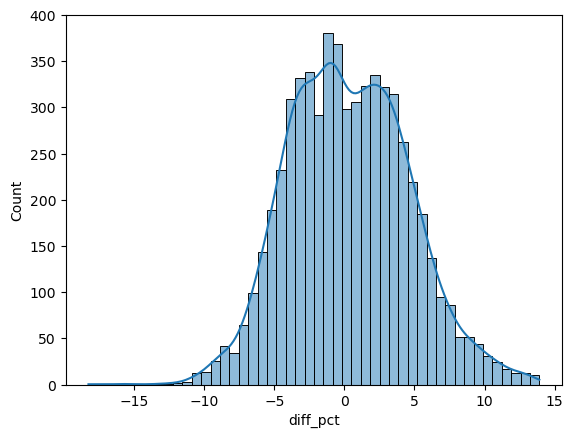

In [115]:
sns.histplot(result_df.diff_pct , kde = True)

In [116]:
extreme_error_threshold = 10
extreme_result_df = result_df[np.abs(result_df['diff_pct']) > extreme_error_threshold ]
extreme_result_df.shape


(129, 4)

In [117]:
result_df.shape

(6026, 4)

In [118]:
# Total error percentage in model 
extreme_error_pct = extreme_result_df.shape[0] * 100 / result_df.shape[0]
extreme_error_pct

# It means model 2.1% predictions are incorrect 
# 2.1% error rate is not that high , you can consider this model for prediction 

2.140723531364089

In [119]:
result_df[np.abs(result_df['diff_pct']) > 50].sort_values(by = 'diff_pct', ascending = False).shape

(0, 4)

In [120]:
# You donot need further anyslis ,ignore below analysis

In [126]:
(y_pred_lr)

array([ 6121.456891  ,  9601.79750962,  5611.05649296, ...,
       13508.60367847,  5109.9980527 , 10714.52357833])

# Export Model 

In [127]:
from joblib import dump 
dump(best_model ,"artifacts/model_young.joblib")

['artifacts/model_young.joblib']

In [128]:
scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale' : cols_to_scale
}  
scaler_with_cols 

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [129]:
dump(scaler_with_cols ,"artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']

In [130]:
# from joblib import load
# model_young = load("artifacts/model_young.joblib")

## Try to find out what are the root cause for such high margin of errors

In [108]:
# extreme_result_df.head()

In [109]:
# extreme_result_df.columns

In [110]:
# extreme_result_df.index

In [111]:
# X_test.head()

In [112]:
# X_test contain indexes of extreme_result_df beause extreme_result_df are part of  X_test- that show high margin error)
#X_test.index

In [113]:
# X_test.shape

In [114]:
# Creating a seperate dataframe to represent error margin (extreme_result_df) in original X_test 
# extreme_error_df = X_test.loc[extreme_result_df.index]
# extreme_error_df.shape

In [115]:
# Actual error in original X_test that are showing wrong prediction 
# extreme_error_df.head()

In [128]:
# extreme_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [129]:
# X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12774,1.0,0.666667,0.040404,0.0,0.0,1,0,0,1,1,0,0,1,0,0,0,0


In [130]:
# X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [116]:
# sns.histplot(X_test.income_lakhs ,label = 'overall', kde = True)
# sns.histplot(extreme_error_df.income_lakhs, label = 'Extreme Error',kde = True)  

In [117]:
# extreme_error_df.head()

### Analyize the feature which are responsilbe for giving higher error 

In [118]:
#for feature in X_test.columns:
#    plt.figure(figsize=(10, 4))
#    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
#   sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
#    plt.legend()
#    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
#   plt.show()

In [119]:
# sns.histplot(extreme_error_df['age'] , kde = True)

1. We cannot find exact error as error are distributed across the category in age 18-25 .
2. So need further feature engg or demand for more data beacuse these feature are not able to explain the variance in target variable . so we need more data .

In [147]:
# Ignore below sections 
# cols_to_scale

In [148]:
# extreme_error_df.columns

In [1050]:
# extreme_error_df['income_level'] = -1

In [1051]:
# df_reversed = pd.DataFrame()
# df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
# df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0
...,...,...,...,...,...
4482,19.0,1.0,-2.0,8.0,1.0
4483,25.0,0.0,-2.0,12.0,1.0
4484,21.0,0.0,-2.0,7.0,2.0
4485,21.0,1.0,-2.0,8.0,1.0


In [149]:
# sns.histplot(df_reversed['age'])

In [1053]:
# df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4487.000000,4487.000000,4487.0,4487.000000,4487.000000
mean,21.804992,0.739247,-2.0,21.182527,1.302429
std,3.172355,0.968855,0.0,20.598596,0.563135
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,100.000000,3.000000


In [150]:
# df_reversed['age'].quantile([0.75,0.95, 0.97])

### Saving Trained Model Object Using Pickle

In [377]:
#import pickle

In [1048]:
# 2. Save the model to a pickle file
#filename = 'xgbr_annual_premium_amount_v1.pkl'  # Choose a filename
#pickle.dump(model_xgb, open(filename, 'wb'))  # 'wb' for write binary

#print(f"Model saved to {filename}")

In [151]:
# 3. (Optional) Load the model from the pickle file later
#loaded_model = pickle.load(open(filename, 'rb'))  # 'rb' for read binary

#predictions = loaded_model.predict(X_test)
#print(f"Predictions using loaded model: {predictions}")

In [152]:
# predictions

In [153]:
# y_pred_xgb

In [154]:
# model_xgb.score(X_test , y_test)

In [155]:
# loaded_model.score(X_test , y_test)